In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('survey.csv')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Extract written answers for later analysis
written_answers = []

# Function to collect written answers
def collect_written_answers(row):
    for col in df.columns:
        if isinstance(row[col], str) and len(row[col]) > 50:  # Longer text responses
            written_answers.append({
                'column': col,
                'answer': row[col],
                'timestamp': row['Časovni žig'] if 'Časovni žig' in row else 'Unknown'
            })

# Apply the function to each row
df.apply(collect_written_answers, axis=1)

Dataset shape: (87, 22)

Columns: ['Časovni žig', 'Koliko ste stari?\nHow old are you?', 'Na kateri fakulteti študirate? (At which faculty do you study?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?)', 'Kateri letnik ste? (Which year of study are you in?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).1', 'Kateri letnik ste? (Which year of study are you in?).1', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).2', 'Kateri letnik ste? (Which year of study are you in?).2', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).3', 'Kateri letnik ste? (Which year of study are you in?).3', 'Katere znamke telefon imate? (What brand of phone do you have?)', 'Vnesite znamko telefona. (Enter your phone brand.)', 'Kateri model telefona imate? (What model of phone do you have?)', 'Kolikšna je bila cena telefona ob nakupu? (What was the price of the phone when you bou

0     None
1     None
2     None
3     None
4     None
      ... 
82    None
83    None
84    None
85    None
86    None
Length: 87, dtype: object

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('survey.csv')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Extract written answers for later analysis
written_answers = []

# Function to collect written answers
def collect_written_answers(row):
    for col in df.columns:
        if isinstance(row[col], str) and len(row[col]) > 50:  # Longer text responses
            written_answers.append({
                'column': col,
                'answer': row[col],
                'timestamp': row['Časovni žig'] if 'Časovni žig' in row else 'Unknown'
            })

# Apply the function to each row
df.apply(collect_written_answers, axis=1)

Dataset shape: (87, 22)

Columns: ['Časovni žig', 'Koliko ste stari?\nHow old are you?', 'Na kateri fakulteti študirate? (At which faculty do you study?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?)', 'Kateri letnik ste? (Which year of study are you in?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).1', 'Kateri letnik ste? (Which year of study are you in?).1', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).2', 'Kateri letnik ste? (Which year of study are you in?).2', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).3', 'Kateri letnik ste? (Which year of study are you in?).3', 'Katere znamke telefon imate? (What brand of phone do you have?)', 'Vnesite znamko telefona. (Enter your phone brand.)', 'Kateri model telefona imate? (What model of phone do you have?)', 'Kolikšna je bila cena telefona ob nakupu? (What was the price of the phone when you bou

0     None
1     None
2     None
3     None
4     None
      ... 
82    None
83    None
84    None
85    None
86    None
Length: 87, dtype: object


DEMOGRAPHIC ANALYSIS


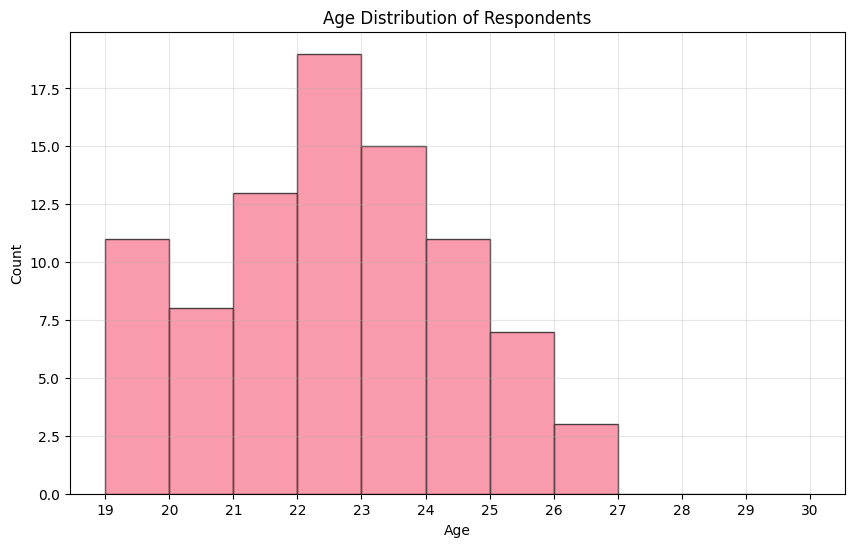

Average age: 22.1 years
Most common age: 22 years


In [3]:
# 1. DEMOGRAPHIC ANALYSIS
print("\n" + "="*50)
print("DEMOGRAPHIC ANALYSIS")
print("="*50)

# Age distribution
plt.figure(figsize=(10, 6))
age_data = df['Koliko ste stari?\nHow old are you?'].dropna()
# Convert age to numeric, handling '26+' values
age_numeric = []
for age in age_data:
    if str(age).endswith('+'):
        age_numeric.append(26)
    else:
        try:
            age_numeric.append(int(age))
        except:
            age_numeric.append(np.nan)
age_numeric = [x for x in age_numeric if not np.isnan(x)]
plt.hist(age_numeric, bins=range(19, 31), edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(19, 31))
plt.grid(True, alpha=0.3)
plt.show()

print(f"Average age: {np.mean(age_numeric):.1f} years")
print(f"Most common age: {pd.Series(age_numeric).mode().iloc[0]} years")

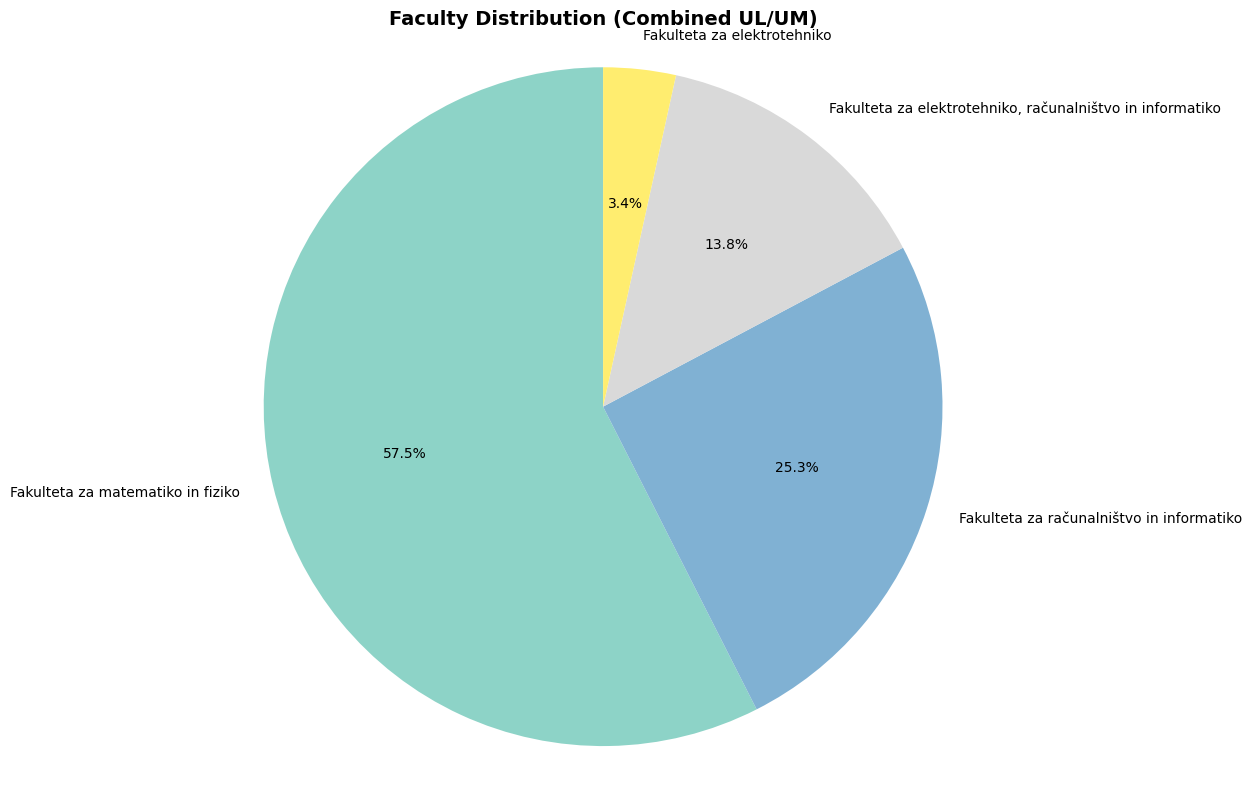

Faculty distribution (combined UL/UM):
Fakulteta za matematiko in fiziko: 50 respondents (57.5%)
Fakulteta za računalništvo in informatiko: 22 respondents (25.3%)
Fakulteta za elektrotehniko, računalništvo in informatiko: 12 respondents (13.8%)
Fakulteta za elektrotehniko: 3 respondents (3.4%)

Total respondents with faculty data: 87
Number of different faculties: 4


In [20]:
import re
# Faculty distribution - Enhanced version
plt.figure(figsize=(12, 8))
faculty_cols = [col for col in df.columns if 'fakultet' in col.lower() or 'faculty' in col.lower()]
faculty_data = []
for col in faculty_cols:
    faculty_data.extend(df[col].dropna().tolist())

# Enhanced faculty name cleaning
def clean_faculty_name(faculty):
    if pd.notna(faculty) and faculty != '':
        # Remove university abbreviations and extra text
        cleaned = faculty
        # Remove UL, UM suffixes
        cleaned = cleaned.replace(' UL', '').replace(' UM', '')
        # Remove any trailing university abbreviations in parentheses
        cleaned = re.sub(r'\s*\([^)]*UL\)', '', cleaned)
        cleaned = re.sub(r'\s*\([^)]*UM\)', '', cleaned)
        # Standardize common faculty names
        if 'matematiko in fiziko' in cleaned.lower():
            cleaned = 'Fakulteta za matematiko in fiziko'
        elif 'elektrotehniko, računalništvo in informatiko' in cleaned.lower():
            cleaned = 'Fakulteta za elektrotehniko, računalništvo in informatiko'
        elif 'računalništvo in informatiko' in cleaned.lower():
            cleaned = 'Fakulteta za računalništvo in informatiko'
        elif 'elektrotehniko' in cleaned.lower():
            cleaned = 'Fakulteta za elektrotehniko'
        return cleaned.strip()
    return faculty

faculty_clean = [clean_faculty_name(f) for f in faculty_data if pd.notna(f) and f != '']
faculty_series = pd.Series(faculty_clean)
faculty_counts = faculty_series.value_counts()

# Create pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(faculty_counts)))
plt.pie(faculty_counts.values, labels=faculty_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title('Faculty Distribution (Combined UL/UM)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Faculty distribution (combined UL/UM):")
for faculty, count in faculty_counts.items():
    percentage = (count / len(faculty_clean)) * 100
    print(f"{faculty}: {count} respondents ({percentage:.1f}%)")

print(f"\nTotal respondents with faculty data: {len(faculty_clean)}")
print(f"Number of different faculties: {len(faculty_counts)}")

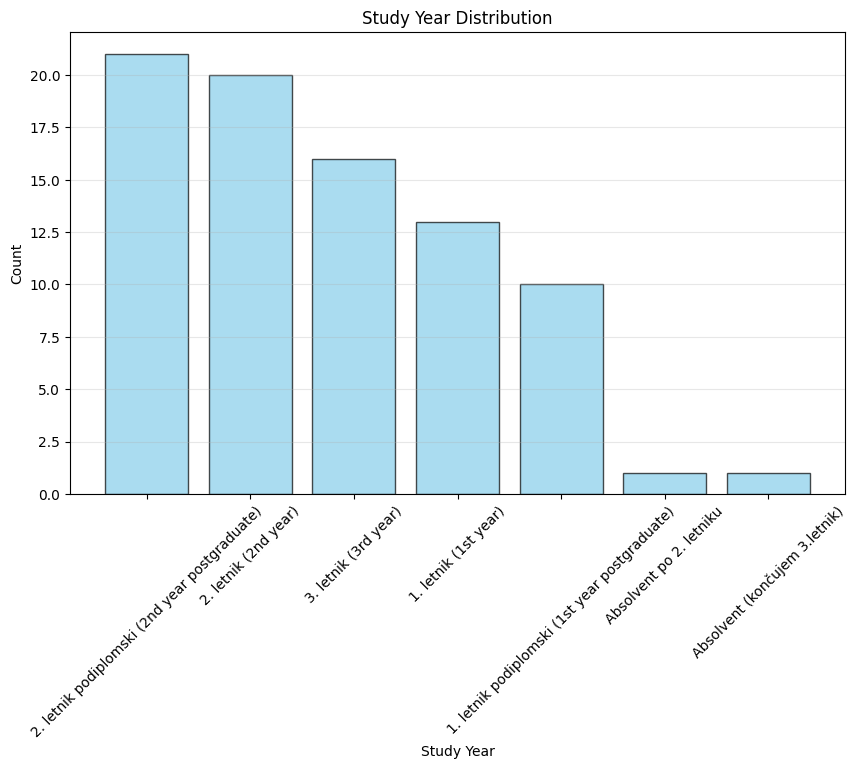

Study year distribution:
2. letnik podiplomski (2nd year postgraduate)    21
2. letnik (2nd year)                             20
3. letnik (3rd year)                             16
1. letnik (1st year)                             13
1. letnik podiplomski (1st year postgraduate)    10
Absolvent po 2. letniku                           1
Absolvent (končujem 3.letnik)                     1
Name: count, dtype: int64

PHONE MODEL ANALYSIS


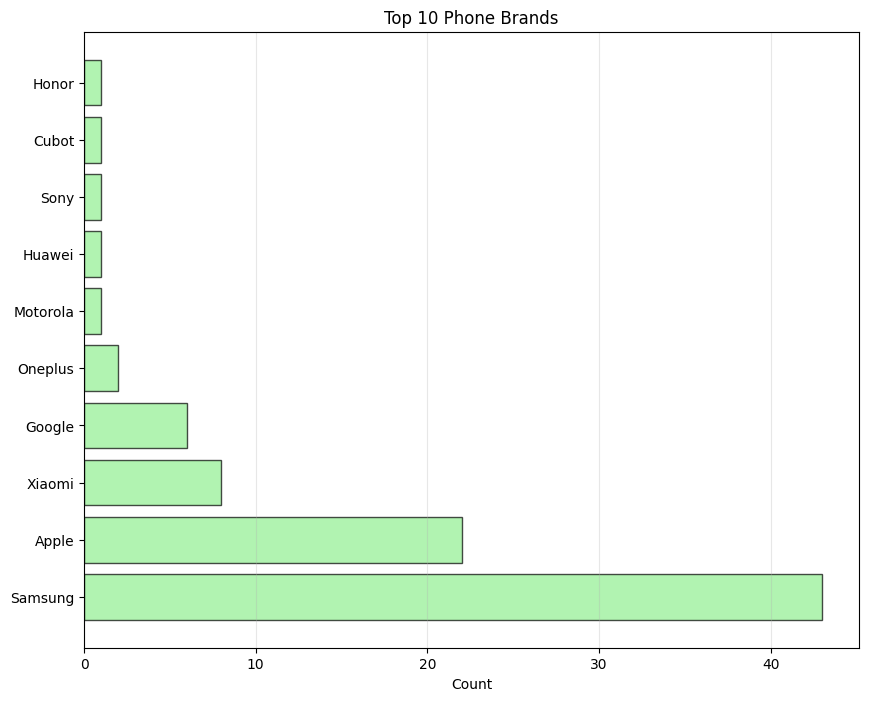

Top phone brands:
Samsung     43
Apple       22
Xiaomi       8
Google       6
Oneplus      2
Motorola     1
Huawei       1
Sony         1
Cubot        1
Honor        1
Name: count, dtype: int64


In [5]:
# Study year distribution
plt.figure(figsize=(10, 6))
year_cols = [col for col in df.columns if 'letnik' in col.lower() or 'year' in col.lower()]
year_data = []
for col in year_cols:
    year_data.extend(df[col].dropna().tolist())

year_clean = [y for y in year_data if pd.notna(y) and y != '' and 'letnik' in str(y).lower()]
year_series = pd.Series(year_clean)
year_counts = year_series.value_counts()

plt.bar(range(len(year_counts)), year_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Study Year Distribution')
plt.xlabel('Study Year')
plt.ylabel('Count')
plt.xticks(range(len(year_counts)), year_counts.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print("Study year distribution:")
print(year_counts)# 2. PHONE MODEL ANALYSIS
print("\n" + "="*50)
print("PHONE MODEL ANALYSIS")
print("="*50)

# Phone brands
plt.figure(figsize=(10, 8))
brand_cols = [col for col in df.columns if 'znamk' in col.lower() or 'brand' in col.lower()]
brand_data = []
for col in brand_cols:
    brand_data.extend(df[col].dropna().tolist())

brand_clean = [b for b in brand_data if pd.notna(b) and b != '' and b != 'Drugo (Other)']
brand_series = pd.Series(brand_clean)
brand_counts = brand_series.value_counts().head(10)

plt.barh(range(len(brand_counts)), brand_counts.values, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Top 10 Phone Brands')
plt.xlabel('Count')
plt.yticks(range(len(brand_counts)), brand_counts.index)
plt.grid(True, alpha=0.3, axis='x')
plt.show()

print("Top phone brands:")
print(brand_counts)

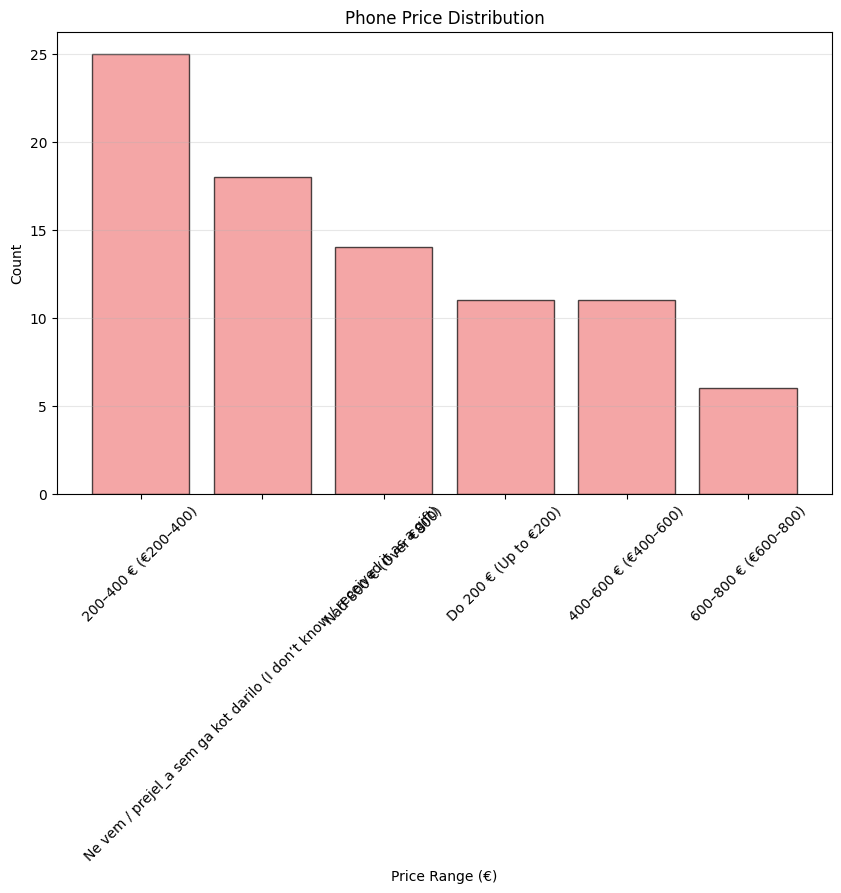

Price distribution:
Kolikšna je bila cena telefona ob nakupu? (What was the price of the phone when you bought it?)
200–400 € (€200–400)                                                          25
Ne vem / prejel_a sem ga kot darilo (I don’t know / received it as a gift)    18
Nad 800 € (Over €800)                                                         14
Do 200 € (Up to €200)                                                         11
400–600 € (€400–600)                                                          11
600–800 € (€600–800)                                                           6
Name: count, dtype: int64


In [6]:
# Price distribution
plt.figure(figsize=(10, 6))
price_col = [col for col in df.columns if 'cen' in col.lower() or 'price' in col.lower()][0]
price_data = df[price_col].dropna()
price_counts = price_data.value_counts()

plt.bar(range(len(price_counts)), price_counts.values, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Phone Price Distribution')
plt.xlabel('Price Range (€)')
plt.ylabel('Count')
plt.xticks(range(len(price_counts)), price_counts.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print("Price distribution:")
print(price_counts)

Sample purchase data:
['Pred 4 leti (2021) (4 years ago - 2021)', 'Pred 3 leti (2022) (3 years ago - 2022)', 'Pred 2 leti (2023) (2 years ago - 2023)', 'Pred 3 leti (2022) (3 years ago - 2022)', 'Pred 5 leti (2020) (5 years ago - 2020)', 'Letos (2025) (This year - 2025)', 'Pred 2 leti (2023) (2 years ago - 2023)', 'Letos (2025) (This year - 2025)', 'Pred 5 leti (2020) (5 years ago - 2020)', 'Pred 2 leti (2023) (2 years ago - 2023)']


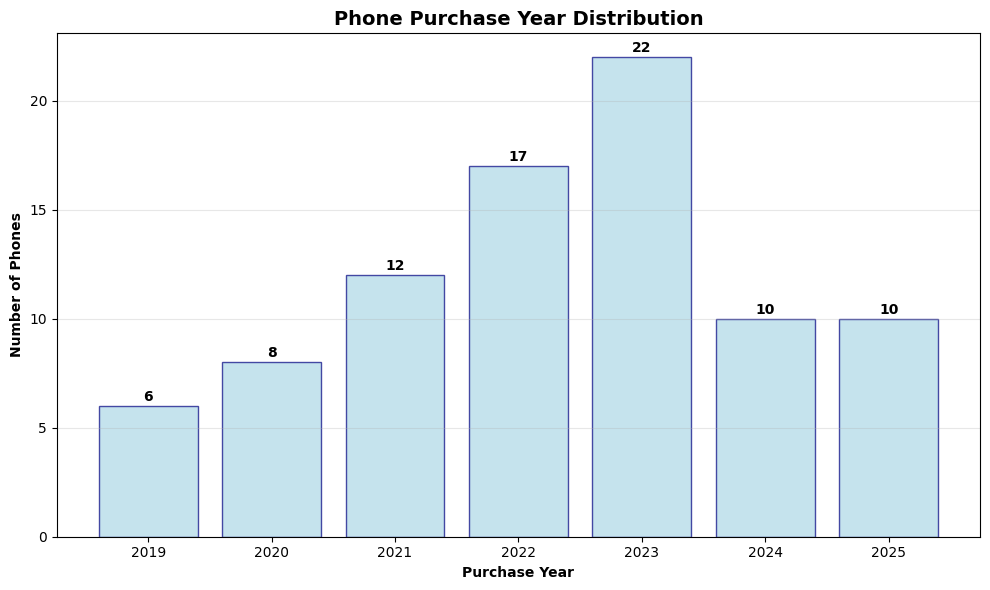

Purchase year distribution:
2019     6
2020     8
2021    12
2022    17
2023    22
2024    10
2025    10
Name: count, dtype: int64

Statistics:
Total responses with purchase data: 85
Successfully extracted years: 85
Extraction rate: 100.0%

Average phone age: 2.7 years
Oldest phone: 6 years old
Newest phone: 0 years old


In [15]:
# Purchase year analysis - Simple version
plt.figure(figsize=(10, 6))
purchase_col = 'Kdaj ste telefon kupili? (When did you buy your phone?)'
purchase_data = df[purchase_col].dropna()

print(f"Sample purchase data:")
print(purchase_data.head(10).tolist())

# Extract years using simple string matching
years = []
for text in purchase_data:
    text_str = str(text)
    
    # Direct year extraction from parentheses
    if '(2020)' in text_str:
        years.append(2020)
    elif '(2021)' in text_str:
        years.append(2021)
    elif '(2022)' in text_str:
        years.append(2022)
    elif '(2023)' in text_str:
        years.append(2023)
    elif '(2024)' in text_str:
        years.append(2024)
    elif '(2025)' in text_str:
        years.append(2025)
    # Handle special cases
    elif 'Letos' in text_str or 'This year' in text_str:
        years.append(2025)
    elif 'Lani' in text_str or 'Last year' in text_str:
        years.append(2024)
    elif 'Pred več kot 5 leti' in text_str or 'More than 5 years ago' in text_str:
        years.append(2019)

if years:
    year_counts = pd.Series(years).value_counts().sort_index()
    
    plt.bar(year_counts.index, year_counts.values, color='lightblue', alpha=0.7, edgecolor='navy')
    plt.title('Phone Purchase Year Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Purchase Year', fontweight='bold')
    plt.ylabel('Number of Phones', fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, count in enumerate(year_counts.values):
        plt.text(year_counts.index[i], count + 0.1, str(count), 
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("Purchase year distribution:")
    print(year_counts)
    print(f"\nStatistics:")
    print(f"Total responses with purchase data: {len(purchase_data)}")
    print(f"Successfully extracted years: {len(years)}")
    print(f"Extraction rate: {len(years)/len(purchase_data)*100:.1f}%")
    
    # Additional analysis
    current_year = 2025
    phone_ages = [current_year - year for year in years]
    print(f"\nAverage phone age: {np.mean(phone_ages):.1f} years")
    print(f"Oldest phone: {current_year - min(years)} years old")
    print(f"Newest phone: {current_year - max(years)} years old")
    
else:
    print("No years could be extracted. Debugging info:")
    print("Unique values in purchase data:")
    print(purchase_data.unique())


PHONE LIFECYCLE AND DISPOSAL ANALYSIS


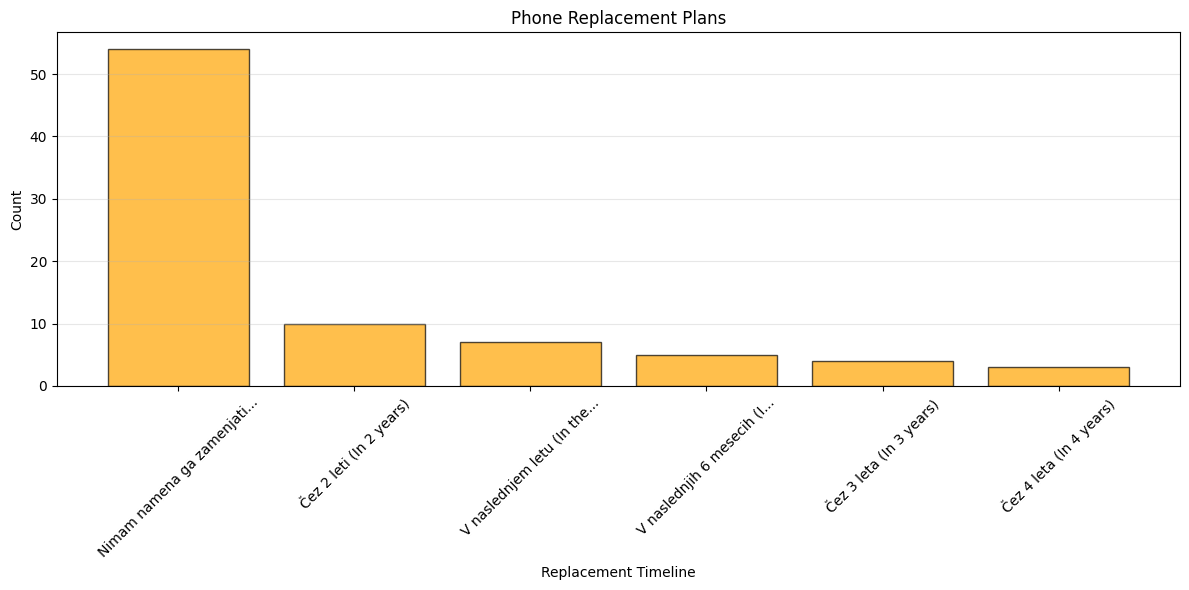

Replacement plans:
Kdaj imate namen telefon zamenjati? (When do you plan to replace your phone?)
Nimam namena ga zamenjati, dokler deluje (I don’t plan to replace it as long as it works)    54
Čez 2 leti (In 2 years)                                                                      10
V naslednjem letu (In the next year)                                                          7
V naslednjih 6 mesecih (In the next 6 months)                                                 5
Čez 3 leta (In 3 years)                                                                       4
Čez 4 leta (In 4 years)                                                                       3
Name: count, dtype: int64


In [8]:
# 3. PHONE LIFECYCLE AND DISPOSAL ANALYSIS
print("\n" + "="*50)
print("PHONE LIFECYCLE AND DISPOSAL ANALYSIS")
print("="*50)

# Replacement plans
plt.figure(figsize=(12, 6))
replace_col = [col for col in df.columns if 'namen zamenjati' in col.lower() or 'plan to replace' in col.lower()][0]
replace_data = df[replace_col].dropna()
replace_counts = replace_data.value_counts().head(6)

plt.bar(range(len(replace_counts)), replace_counts.values, color='orange', edgecolor='black', alpha=0.7)
plt.title('Phone Replacement Plans')
plt.xlabel('Replacement Timeline')
plt.ylabel('Count')
plt.xticks(range(len(replace_counts)), [str(x)[:25] + '...' if len(str(x)) > 25 else str(x) for x in replace_counts.index], rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Replacement plans:")
print(replace_counts)

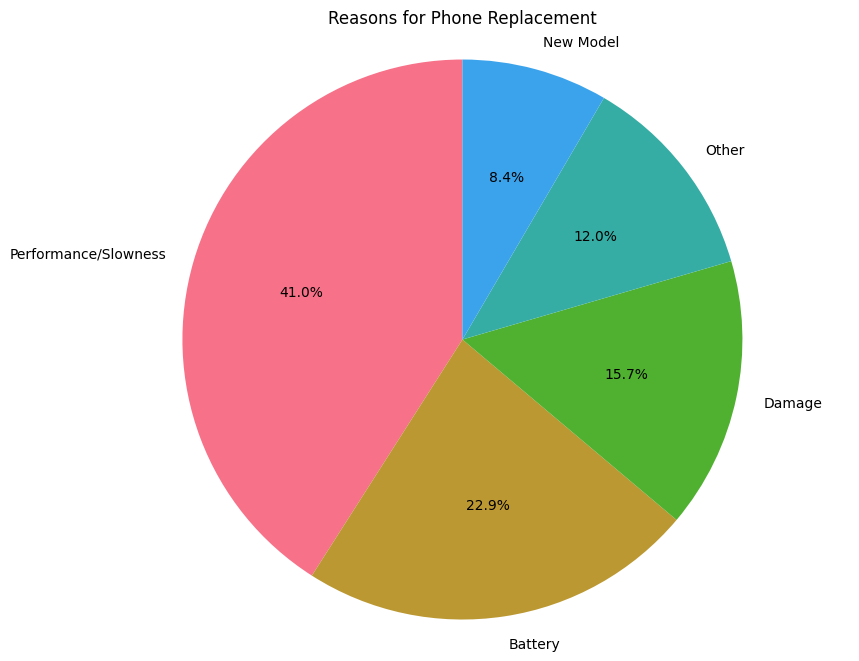

Reasons for replacement:
Performance/Slowness    34
Battery                 19
Damage                  13
Other                   10
New Model                7
Name: count, dtype: int64


In [9]:
# Reasons for replacement
plt.figure(figsize=(10, 8))
reason_col = [col for col in df.columns if 'zakaj' in col.lower() and 'namen' in col.lower() or 'why' in col.lower() and 'plan' in col.lower()][0]
reason_data = df[reason_col].dropna()

# Categorize reasons
replacement_reasons = {
    'Performance/Slowness': ['počas', 'slow', 'outdated', 'zastarel'],
    'Battery': ['baterij', 'battery'],
    'Damage': ['poškod', 'damage', 'pokvaril'],
    'New Model': ['novejš', 'newer model', 'želim nov'],
    'Other': []  # Catch-all
}

reason_categories = []
for reason in reason_data:
    reason_str = str(reason).lower()
    categorized = False
    for category, keywords in replacement_reasons.items():
        if any(keyword in reason_str for keyword in keywords):
            reason_categories.append(category)
            categorized = True
            break
    if not categorized:
        reason_categories.append('Other')

reason_counts = pd.Series(reason_categories).value_counts()
plt.pie(reason_counts.values, labels=reason_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Reasons for Phone Replacement')
plt.axis('equal')
plt.show()

print("Reasons for replacement:")
print(reason_counts)

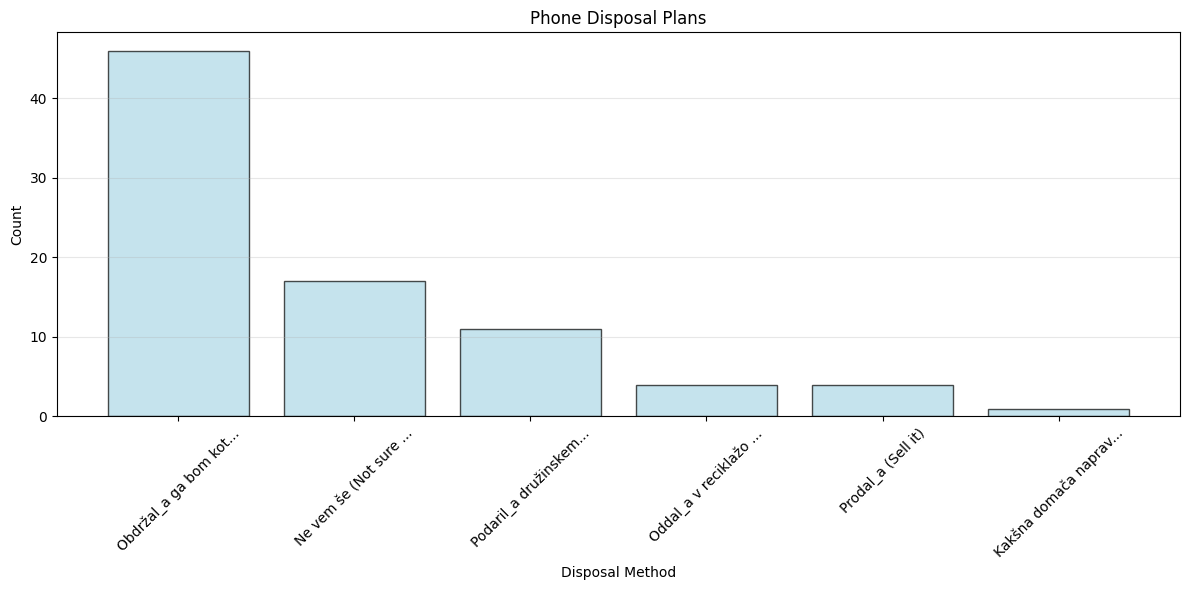

Disposal plans:
Kam ga boste dali po zamenjavi? (What will you do with it after replacement?)
Obdržal_a ga bom kot rezervni telefon (Keep it as a backup phone)               46
Ne vem še (Not sure yet)                                                        17
Podaril_a družinskemu članu / prijatelju (Give it to a family member/friend)    11
Oddal_a v reciklažo / zbirni center (Recycle / take to collection center)        4
Prodal_a (Sell it)                                                               4
Kakšna domača naprava, mogoče imessage server ali kamera ipd                     1
Name: count, dtype: int64


In [10]:
# Phone disposal plans
plt.figure(figsize=(12, 6))
disposal_col = [col for col in df.columns if 'kam ga bosten' in col.lower() or 'what will you do' in col.lower()][0]
disposal_data = df[disposal_col].dropna()
disposal_counts = disposal_data.value_counts().head(6)

plt.bar(range(len(disposal_counts)), disposal_counts.values, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Phone Disposal Plans')
plt.xlabel('Disposal Method')
plt.ylabel('Count')
plt.xticks(range(len(disposal_counts)), [str(x)[:20] + '...' if len(str(x)) > 20 else str(x) for x in disposal_counts.index], rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Disposal plans:")
print(disposal_counts)

In [11]:
# Additional detailed analysis
print("\n" + "="*50)
print("DETAILED STATISTICS")
print("="*50)

# Brand popularity by faculty
print("\nTop Brands by Faculty:")
faculty_brand_data = []
for idx, row in df.iterrows():
    faculty = None
    brand = None
    
    # Get faculty
    for col in faculty_cols:
        if pd.notna(row[col]) and row[col] != '':
            faculty = row[col]
            break
    
    # Get brand
    for col in brand_cols:
        if pd.notna(row[col]) and row[col] != '' and row[col] != 'Drugo (Other)':
            brand = row[col]
            break
    
    if faculty and brand:
        faculty_brand_data.append({'faculty': faculty, 'brand': brand})

faculty_brand_df = pd.DataFrame(faculty_brand_data)
if not faculty_brand_df.empty:
    top_faculty_brands = faculty_brand_df.groupby('faculty')['brand'].agg(lambda x: x.value_counts().index[0] if len(x) > 0 else 'None')
    print(top_faculty_brands.head())
else:
    print("No faculty-brand data found")

# Replacement timeline analysis
replacement_timeline = {
    'Immediate (within 6 months)': ['6 mesecih', '6 months', 'naslednjih 6'],
    'Short term (within 1 year)': ['naslednjem letu', 'next year'],
    'Medium term (1-3 years)': ['2 leti', '3 leta', '2 years', '3 years'],
    'Long term (3+ years)': ['4 leta', '5 leta', '4 years', '5 years'],
    'No plans': ['nimam namena', "don't plan", 'dokler deluje']
}

timeline_categories = []
for plan in replace_data:
    plan_str = str(plan).lower()
    for category, keywords in replacement_timeline.items():
        if any(keyword in plan_str for keyword in keywords):
            timeline_categories.append(category)
            break
    else:
        timeline_categories.append('Other')

timeline_counts = pd.Series(timeline_categories).value_counts()
print("\nReplacement Timeline Categories:")
print(timeline_counts)


DETAILED STATISTICS

Top Brands by Faculty:
faculty
Fakulteta za elektrotehniko (Faculty of Electrical Engineering) UL                                                         Apple
Fakulteta za elektrotehniko, računalništvo in informatiko (Faculty of Electrical Engineering and Computer Science) UM    Samsung
Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics)                                                   Samsung
Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics) UL                                                Samsung
Fakulteta za računalništvo in informatiko (Faculty of Computer and Information Science)                                    Apple
Name: brand, dtype: object

Replacement Timeline Categories:
No plans                       54
Medium term (1-3 years)        14
Short term (within 1 year)      7
Immediate (within 6 months)     5
Long term (3+ years)            5
Name: count, dtype: int64


In [12]:
# Display written answers for manual analysis
print("\n" + "="*50)
print("WRITTEN ANSWERS FOR MANUAL ANALYSIS")
print("="*50)
print(f"Total written answers collected: {len(written_answers)}")

if written_answers:
    print("\nSample of written answers:")
    for i, answer in enumerate(written_answers[:5]):  # Show first 5
        print(f"\n--- Answer {i+1} ---")
        print(f"Column: {answer['column']}")
        print(f"Answer: {answer['answer'][:200]}...")  # First 200 characters
    
    # Save written answers to file for further analysis
    written_df = pd.DataFrame(written_answers)
    written_df.to_csv('written_answers_analysis.csv', index=False, encoding='utf-8')
    print(f"\nAll written answers saved to 'written_answers_analysis.csv'")
else:
    print("No substantial written answers found.")


WRITTEN ANSWERS FOR MANUAL ANALYSIS
Total written answers collected: 400

Sample of written answers:

--- Answer 1 ---
Column: Na kateri fakulteti študirate? (At which faculty do you study?)
Answer: Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics)...

--- Answer 2 ---
Column: Kateri študijski program obiskujete? (Which study program are you enrolled in?).2
Answer: Univerzitetni študijski program FIZIKA (University Study Program PHYSICS)...

--- Answer 3 ---
Column: Kam ga boste dali po zamenjavi? (What will you do with it after replacement?)
Answer: Obdržal_a ga bom kot rezervni telefon (Keep it as a backup phone)...

--- Answer 4 ---
Column: Kam ste prejšnji telefon dali/odvrgli? (What did you do with your previous phone?)
Answer: Obdržal_a kot rezervni telefon (Kept it as a backup phone)...

--- Answer 5 ---
Column: Na kateri fakulteti študirate? (At which faculty do you study?)
Answer: Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics)...



In [13]:
# Create a summary statistics table
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

summary_stats = {
    'Total Respondents': len(df),
    'Average Age': f"{np.mean(age_numeric):.1f} years",
    'Most Common Brand': brand_counts.index[0] if len(brand_counts) > 0 else 'N/A',
    'Most Common Price Range': price_counts.index[0] if len(price_counts) > 0 else 'N/A',
    'Most Common Replacement Plan': replace_counts.index[0] if len(replace_counts) > 0 else 'N/A',
    'Phones to be Kept as Backup': disposal_counts.get('Obdržal_a ga bom kot rezervni telefon (Keep it as a backup phone)', 0)
}

for stat, value in summary_stats.items():
    print(f"{stat}: {value}")

print("\nAnalysis complete!")


SUMMARY STATISTICS
Total Respondents: 87
Average Age: 22.1 years
Most Common Brand: Samsung
Most Common Price Range: 200–400 € (€200–400)
Most Common Replacement Plan: Nimam namena ga zamenjati, dokler deluje (I don’t plan to replace it as long as it works)
Phones to be Kept as Backup: 46

Analysis complete!


In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Load the data
df = pd.read_csv('survey.csv')

print("Original dataset shape:", df.shape)
print("Original columns:", df.columns.tolist())

# Create a clean, structured dataframe
def create_clean_dataframe(df):
    """
    Process the raw survey data into a clean, structured DataFrame
    """
    clean_data = []
    
    for idx, row in df.iterrows():
        record = {}
        
        # Basic info
        record['timestamp'] = row['Časovni žig'] if 'Časovni žig' in row else None
        record['age'] = process_age(row['Koliko ste stari?\nHow old are you?'])
        
        # Demographic data
        record['faculty'] = get_faculty(row)
        record['study_program'] = get_study_program(row)
        record['study_year'] = get_study_year(row)
        
        # Phone information
        record['phone_brand'] = get_phone_brand(row)
        record['phone_model'] = get_phone_model(row)
        record['phone_price'] = get_phone_price(row)
        record['purchase_year'] = get_purchase_year(row)
        record['phone_age'] = 2025 - record['purchase_year'] if record['purchase_year'] else None
        
        # Replacement plans
        record['replacement_plan'] = get_replacement_plan(row)
        record['replacement_reason'] = get_replacement_reason(row)
        record['disposal_plan'] = get_disposal_plan(row)
        
        # Previous phone
        record['prev_phone_replacement_reason'] = get_prev_replacement_reason(row)
        record['prev_phone_disposal'] = get_prev_disposal(row)
        
        # Additional info
        record['additional_info'] = get_additional_info(row)
        
        clean_data.append(record)
    
    return pd.DataFrame(clean_data)

# Processing functions
def process_age(age_value):
    """Extract age as integer"""
    if pd.isna(age_value):
        return None
    try:
        if str(age_value).endswith('+'):
            return 26
        return int(age_value)
    except:
        return None

def get_faculty(row):
    """Extract and standardize faculty"""
    faculty_cols = [col for col in df.columns if 'fakultet' in col.lower() or 'faculty' in col.lower()]
    for col in faculty_cols:
        if pd.notna(row[col]) and row[col] != '':
            faculty = row[col]
            # Standardize faculty names
            if 'matematiko in fiziko' in faculty.lower():
                return 'Fakulteta za matematiko in fiziko UL'
            elif 'elektrotehniko, računalništvo in informatiko' in faculty.lower():
                return 'Fakulteta za elektrotehniko, računalništvo in informatiko UM'
            elif 'računalništvo in informatiko' in faculty.lower() and 'elektrotehniko' not in faculty.lower():
                return 'Fakulteta za računalništvo in informatiko UL'
            elif 'elektrotehniko' in faculty.lower():
                return 'Fakulteta za elektrotehniko UL'
            else:
                return faculty
    return None

def get_study_program(row):
    """Extract study program"""
    program_cols = [col for col in df.columns if 'študijski program' in col.lower() or 'study program' in col.lower()]
    for col in program_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_study_year(row):
    """Extract study year"""
    year_cols = [col for col in df.columns if 'letnik' in col.lower() or 'year' in col.lower()]
    for col in year_cols:
        if pd.notna(row[col]) and row[col] != '' and 'letnik' in str(row[col]).lower():
            return row[col]
    return None

def get_phone_brand(row):
    """Extract phone brand"""
    brand_cols = [col for col in df.columns if 'znamk' in col.lower() or 'brand' in col.lower()]
    for col in brand_cols:
        if pd.notna(row[col]) and row[col] != '' and row[col] != 'Drugo (Other)':
            return row[col]
    return None

def get_phone_model(row):
    """Extract phone model"""
    model_cols = [col for col in df.columns if 'model' in col.lower() and 'študijski' not in col.lower()]
    for col in model_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_phone_price(row):
    """Extract phone price range"""
    price_cols = [col for col in df.columns if 'cen' in col.lower() or 'price' in col.lower()]
    for col in price_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_purchase_year(row):
    """Extract purchase year"""
    purchase_cols = [col for col in df.columns if 'kupili' in col.lower() or 'bought' in col.lower()]
    for col in purchase_cols:
        if pd.notna(row[col]) and row[col] != '':
            text = str(row[col])
            # Extract year from patterns like "Pred 4 leti (2021)"
            year_match = re.search(r'\((\d{4})\)', text)
            if year_match:
                return int(year_match.group(1))
            elif 'Letos' in text or 'This year' in text:
                return 2025
            elif 'Lani' in text or 'Last year' in text:
                return 2024
            elif 'Pred več kot 5 leti' in text or 'More than 5 years ago' in text:
                return 2019
    return None

def get_replacement_plan(row):
    """Extract replacement plan"""
    replace_cols = [col for col in df.columns if 'namen zamenjati' in col.lower() or 'plan to replace' in col.lower()]
    for col in replace_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_replacement_reason(row):
    """Extract replacement reason"""
    reason_cols = [col for col in df.columns if 'zakaj' in col.lower() and 'namen' in col.lower() or 'why' in col.lower() and 'plan' in col.lower()]
    for col in reason_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_disposal_plan(row):
    """Extract disposal plan"""
    disposal_cols = [col for col in df.columns if 'kam ga boste' in col.lower() or 'what will you do' in col.lower()]
    for col in disposal_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_prev_replacement_reason(row):
    """Extract previous phone replacement reason"""
    prev_reason_cols = [col for col in df.columns if 'zakaj ste zamenjali' in col.lower() or 'why did you replace' in col.lower()]
    for col in prev_reason_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_prev_disposal(row):
    """Extract previous phone disposal method"""
    prev_disposal_cols = [col for col in df.columns if 'kam ste prejšnji' in col.lower() or 'what did you do with your previous' in col.lower()]
    for col in prev_disposal_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_additional_info(row):
    """Extract additional information"""
    info_cols = [col for col in df.columns if 'dodatne informacije' in col.lower() or 'additional information' in col.lower()]
    for col in info_cols:
        if pd.notna(row[col]) and row[col] != '' and row[col] != '/':
            return row[col]
    return None

# Create the clean dataframe
print("Processing data...")
clean_df = create_clean_dataframe(df)

print("\n" + "="*60)
print("CLEAN DATAFRAME CREATED SUCCESSFULLY!")
print("="*60)

print(f"Clean dataset shape: {clean_df.shape}")
print(f"Clean columns: {clean_df.columns.tolist()}")

# Display basic info about the clean dataframe
print("\n" + "="*60)
print("DATAFRAME OVERVIEW")
print("="*60)
print(clean_df.info())

print("\n" + "="*60)
print("SAMPLE DATA (first 5 rows)")
print("="*60)
print(clean_df.head())

print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)
print(f"Total respondents: {len(clean_df)}")
print(f"Age range: {clean_df['age'].min()} - {clean_df['age'].max()} years")
print(f"Average age: {clean_df['age'].mean():.1f} years")
print(f"Number of faculties: {clean_df['faculty'].nunique()}")
print(f"Number of phone brands: {clean_df['phone_brand'].nunique()}")
print(f"Phone age range: {clean_df['phone_age'].min()} - {clean_df['phone_age'].max()} years")

# Save to CSV for later use
clean_df.to_csv('smartphone_survey_clean.csv', index=False, encoding='utf-8')
print(f"\nClean data saved to 'smartphone_survey_clean.csv'")

# Show value counts for key categorical variables
print("\n" + "="*60)
print("VALUE COUNTS FOR KEY VARIABLES")
print("="*60)

key_columns = ['faculty', 'phone_brand', 'phone_price', 'replacement_plan', 'disposal_plan']
for col in key_columns:
    print(f"\n{col}:")
    print(clean_df[col].value_counts().head(10))